# Numerical solution to the 1-dimensional Time Independent Schroedinger Equation
Based on the paper "Matrix Numerov method for solving Schroedinger's equation" by Mohandas Pillai, Joshua Goglio, and Thad G. Walker, _American Journal of Physics_ **80** (11), 1017 (2012).  [doi:10.1119/1.4748813](http://dx.doi.org/10.1119/1.4748813)

## Variational method
Using the Numerov approximation for the kinetic energy operator to calculate the expectation value of energy of a trial wavefunction.  From here, the energy may be minimized to find a variational solution.  Plot the ground state of this solution and the "true" solution, and compare their energies.


In [1]:
# import some needed libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
%matplotlib inline

In [2]:
#import timeit # for timing the execution

In [3]:
autoscale = False # set this equal to true to use Pillai's recommended step sizes

This example is the finite square well.

Using units such that &hbar;, *m*, and *a* are one.

In [4]:
# values of constants
hbar = 1.0
mass = 1.0 # changing the mass will also change the energy scale
halfwidth = 1.0 # half width of the well (called L in the homework)
V0 = 18.0*np.sqrt(hbar/mass)/halfwidth**2

In [5]:
# bounds (These are overwritten if autoscale=True)
xmin = -10.*halfwidth # lower bound of position
xmax = 10*halfwidth # upper bound of position
n = 1000 # number of steps (may be overwritten if autoscale == True)
dx = (xmax-xmin)/(n-1)

In [6]:
# the function V is the potential energy function
def V(x):
    # make sure there is no division by zero
    # this also needs to be a "vectorizable" function
    # uncomment one of the examples below, or write your own.
    #return 0.5*mass*omega**2*x*x # harmonic oscillator
    return np.piecewise(x, [np.abs(x)<= halfwidth, np.abs(x)>halfwidth],[0.0,V0])
    


In [7]:
if (autoscale): 
    #Emax is the maximum energy for which to check for eigenvalues
    Emax = 20.0
    #The next lines make some reasonable choices for the position grid size and spacing
    xt = opt.brentq(lambda x: V(x)-Emax ,0,5*Emax) #classical turning point
    dx = 1.0/np.sqrt(2*Emax) #step size
    # bounds and number of steps
    n = np.int(0.5+2*(xt/dx + 4.0*np.pi)) #number of steps
    xmin = -dx*(n+1)/2 
    xmax = dx*(n+1)/2

In [8]:
xmin, xmax, n #show the limits and number of steps

(-10.0, 10.0, 1000)

In [9]:
#define the x coordinates
x = np.linspace(xmin,xmax,n)

In [10]:
#define the numerov matrices
B = np.matrix((np.eye(n,k=-1)+10.0*np.eye(n,k=0)+np.eye(n,k=1))/12.0)
A = np.matrix((np.eye(n,k=-1)-2.0*np.eye(n,k=0)+np.eye(n,k=1))/(dx**2))

In [11]:
#calculate kinetic energy operator using Numerov's approximation
KE = -0.5*hbar**2/mass*B.I*A

In [12]:
#calculate hamiltonian operator approximation
H = KE + np.diag(V(x))

In [13]:
#Calculate eigenvalues and eigenvectors of H
energies, wavefunctions = np.linalg.eigh(H) # "wavefunctions" is a matrix with one eigenvector in each column.

For comparison, the eigenvalue calculation took 32s for _n_ = 1000.

In [14]:
true_gs_energy = energies[0]

In [15]:
#trial wavefunction
def psi(a=1.0):
    '''Wavefunction as a function of position x.
    The array "a" stores any parameters.'''
    # Note, normalization is not necessary
    #psi_unnorm = np.exp(-x**2*a) # gaussian
    #psi_unnorm = np.piecewise(x,[np.abs(x*a)<1.0,np.abs(x*a)>=1.0],[lambda x:1.0+np.cos(a*np.pi*x),0.0])# cosine**2 piece
    psi_unnorm = np.piecewise(x,[np.abs(x*a)<1.0,np.abs(x*a)>=1.0],[lambda x:np.cos(a*np.pi*x/2.0),0.0])# cosine piece
    norm = 1.0/np.sqrt(np.dot(psi_unnorm,psi_unnorm))
    return norm*psi_unnorm

In [16]:
def ev(psi):
    '''Calculate expectation value of energy'''
    return np.dot(np.dot(psi,H),psi)[0,0]

In [17]:
# minimize expectation value with respect to a
result=opt.minimize_scalar(lambda a: ev(psi(a)))


For comparison, the variational calculation took 0.5s with _n_=1000.

In [21]:
print(f"The value of a is {result.x:.3f}, with an energy of {result.fun:.3f}, compared to the energy from the Numerov diagonalization of {true_gs_energy:.3f}.")

The value of a is 0.847, with an energy of 0.982, compared to the energy from the Numerov diagonalization of 0.902.


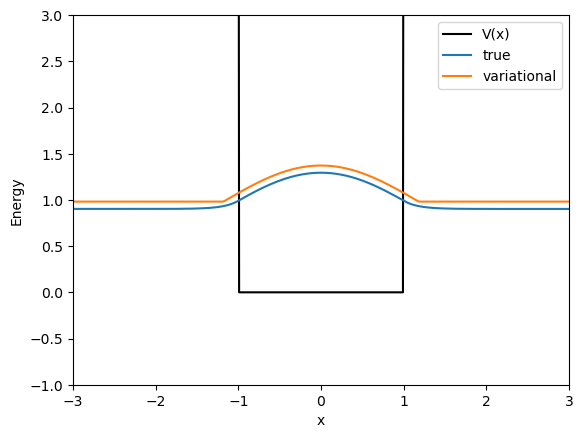

In [19]:
zoom = 3.0 # zoom factor for wavefunctions to make them more visible
plt.plot(x,V(x),'-k',label="V(x)") # plot the potential
plt.plot(x,zoom*np.sign(wavefunctions[n//2,0])*wavefunctions[:,0]+energies[0],label="true") #plot the num-th wavefunction
plt.plot(x,zoom*psi(result.x)+result.fun,label="variational") # plot the variational wavefunction
plt.ylim(-1,3); # set limits of vertical axis for plot
plt.xlim(-3,3); # set limits of horizontal axis for plot
plt.legend();
plt.xlabel("x");
plt.ylabel("Energy");